Load Julia packages (libraries) needed

### snippet 0.5 is replaced by below `using StatisticalRethinking`.

In [1]:
using StatisticalRethinking, GLM
#gr(size=(600, 600));

### snippet 0.4

In [2]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64,Float64,Float64,Int64
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


Fit a linear regression of distance on speed

In [3]:
m = lm(@formula(height ~ weight), df2)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = (::getfield(StatsModels, Symbol("##18#19")){DataFrame})(::Symbol) at modelframe.jl:145
└ @ StatsModels /Users/rob/.julia/packages/StatsModels/pBxdt/src/modelframe.jl:145
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = check_non_redundancy!(::StatsModels.Terms, ::DataFrame) at modelframe.jl:84
└ @ StatsModels /Users/rob/.julia/packages/StatsModels/pBxdt/src/modelframe.jl:84
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = #modelmat_cols#30(::Bool, ::typeof(StatsModels.modelmat_cols), ::Type{Array{Float64,2}}, ::Symbol, ::StatsModels.ModelFrame) at modelmatrix.jl:34
└ @ StatsModels /Users/rob/.julia/packages/StatsModels/pBxdt/src/modelmatrix.jl:34
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: height ~ 1 + weight

Coefficients:
─────────────────────────────────────────────────────
               Estimate  Std.Error  t value  Pr(>|t|)
─────────────────────────────────────────────────────
(Intercept)  113.879     1.91107    59.5895    <1e-99
weight         0.905029  0.0420475  21.524     <1e-65
─────────────────────────────────────────────────────

estimated coefficients from the model

In [4]:
coef(m)

2-element Array{Float64,1}:
 113.8793936068921   
   0.9050291086266783

Plot residuals against speed

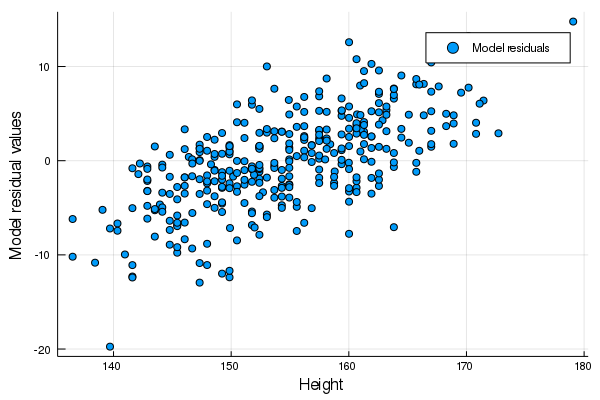

In [5]:
scatter( df2[!, :height], residuals(m), xlab="Height",
ylab="Model residual values", lab="Model residuals")

End of `00/clip-04-05.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*